In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import networkx.algorithms.community as nxcom
from community import community_louvain

import ipdb

In [2]:
nodes = pd.read_csv('Proj_Data/node.csv', index_col=0)
edges = pd.read_csv('Proj_Data/edges_with_qkv.csv', index_col=0)

In [3]:
relation_df = edges[['node1', 'node2', 'q']].copy()

In [4]:
relation = np.array(relation_df)

In [5]:
G = nx.Graph()
G.add_nodes_from(np.array(nodes.index))
G.add_weighted_edges_from(relation)  # add weight from flow

print('There are %d nodes.' % G.number_of_nodes())
print('There are %d edges.' % G.number_of_edges())

There are 1304 nodes.
There are 1397 edges.


In [6]:
pos0 = nodes.loc[:, ['Long', 'Lat']]
pos0 = np.array(pos0)

vnode = pos0
npos = dict(zip(np.array(nodes.index), vnode))  # 获取节点与坐标之间的映射关系，用字典表示

In [7]:
partition = community_louvain.best_partition(G, resolution=55, weight='weight', random_state=1)

In [8]:
community_louvain.modularity(partition, G)

0.6542802084285455

In [9]:
par_df = pd.DataFrame(partition, index=[0]).T
par_df.columns=['cls']

In [10]:
nodes['cls'] = par_df['cls']
nodes['q0'] = nodes['q']*12
nodes['k0'] = nodes['q0']/nodes['v']

In [11]:
len(nodes['cls'].drop_duplicates())

8

In [12]:
data_new = pd.read_csv('./Proj_Data/2019-10-21_with_cord.csv', index_col=0)
data_new = data_new.loc[data_new['Lane type']=='ML']

In [13]:
data_new['cls'] = ''
for i in nodes.index:
    ID = nodes.loc[i, 'ID']
    cls = nodes.loc[i, 'cls']
    data_new.loc[data_new['ID']==ID, 'cls'] = cls
data_new['q0'] = data_new['q'] * 12
data_new['k0'] = data_new['q0'] / data_new['Avg v']

There are 4 classes


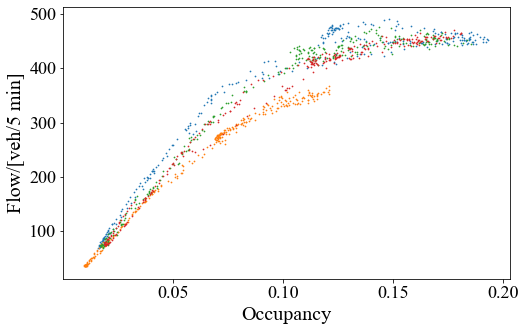

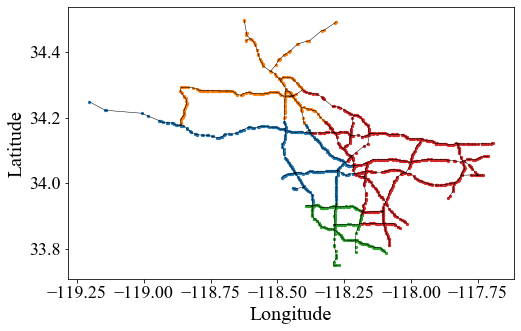

In [21]:
c = 0
c_set = []
color_set = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.rcParams['font.family'] = 'Times New Roman'
fig_mfd = plt.figure(figsize=[8,5])
ax_mfd = fig_mfd.add_subplot(111)
fig_net = plt.figure(figsize=[8,5])
ax_net = fig_net.add_subplot(111)

for i in edges.index:
    node1 = edges.loc[i, 'node1']
    node2 = edges.loc[i, 'node2']
    ax_net.plot([nodes.loc[node1, 'Long'], nodes.loc[node2, 'Long']], [nodes.loc[node1, 'Lat'], nodes.loc[node2, 'Lat']], 'black', lw=0.5)

ft = 20
font = {'family': 'Times New Roman',
         'weight': 'normal',
        'size': ft,
        }

for i in [2,1,0,3]:
    data_cls = data_new.loc[data_new['cls']==i].sort_values(by=['ID', 'Time'])
    q_cls = data_cls['q'].values
    if q_cls.reshape(-1, 288).shape[0] <= 1:
        continue
    q_cls_avg = q_cls.reshape(-1, 288).mean(axis=0)
    k_cls = data_cls['Avg k'].values
    k_cls_avg = k_cls.reshape(-1, 288).mean(axis=0)
    ax_mfd.scatter(k_cls_avg, q_cls_avg, s=.5, c=color_set[c])
    ax_mfd.set_xlabel('Occupancy', fontdict=font)
    ax_mfd.set_ylabel('Flow/[veh/5 min]', fontdict=font)
    ax_mfd.tick_params(axis='both', which='major', labelsize=ft*0.9)
    
    lng = nodes.loc[nodes['cls']==i, 'Long']
    lat = nodes.loc[nodes['cls']==i, 'Lat']
    ax_net.scatter(lng, lat, s=5, c=color_set[c])
    ax_net.set_xlabel('Longitude', fontdict=font)
    ax_net.set_ylabel('Latitude', fontdict=font)
    ax_net.tick_params(axis='both', which='major', labelsize=ft*0.9)
    c+=1
    c_set.append(i)
print('There are %i classes'%c)
# fig_mfd.savefig('./img/fig_mfd.png', dpi=500)
# fig_net.savefig('./img/fig_net.png', dpi=500)

In [15]:
# a = 3
for a in c_set:
    NSk = 0
    for c in c_set:
        NSk += 2*nodes.loc[nodes['cls']==a, 'q'].std()**2/(nodes.loc[nodes['cls']==a, 'q'].std()**2+nodes.loc[nodes['cls']==c, 'q'].std()**2+(nodes.loc[nodes['cls']==a, 'q'].mean()-nodes.loc[nodes['cls']==c, 'q'].mean())**2)
    print(NSk/len(c_set))

0.9101017177170219
0.7532068508044409
0.903345910219914
0.82089993784647


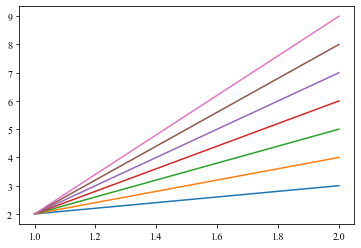

In [16]:
plt.plot([1,2], [2,3])
plt.plot([1,2], [2,4])
plt.plot([1,2], [2,5])
plt.plot([1,2], [2,6])
plt.plot([1,2], [2,7])
plt.plot([1,2], [2,8])
plt.plot([1,2], [2,9])

In [17]:
len(nodes.loc[nodes['cls']==a, 'q'])

625

In [20]:
TV = 0
for c in c_set:
    TV += nodes.loc[nodes['cls']==c, 'q'].__len__()*nodes.loc[nodes['cls']==c, 'q'].std()**2
print('Abs TV:', TV)
print('Norm TV:', TV/(nodes.__len__()*nodes['q'].std()**2))

Abs TV: 12262442.766535029
Norm TV: 0.8362810666721276


In [19]:
nodes.loc[nodes['cls']==c, 'q']

0       410.684028
1       405.503472
2       383.663194
3       393.451389
4       381.265625
           ...    
1305    361.559028
1310     75.479167
1311    498.100694
1319    314.135417
1320    443.822917
Name: q, Length: 625, dtype: float64